In [29]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('csv_result_mercury/result_8.csv')
df

,seed,True,ARMA,Informer,Informer_para,RNN
0,10,"[0.9540683597246074, -1.4948819926179446, -2.0...","[0.5160140247731227, 0.4698219346155802, -1.66...","[0.304466, 0.6533288, -0.018639164, -0.309522,...","(20, 10)","[0.6641402244567871, 0.3958827555179596, -1.50..."
1,11,"[1.220552242568979, 0.6384145957159848, -0.789...","[0.6584036722915957, 0.7042699586403753, -0.01...","[0.8173727, 0.12780194, 1.0458269, -1.0059268,...","(50, 20)","[0.4609455168247223, 0.6881060600280762, 0.143..."
2,12,"[-0.5665367880497909, 1.1403017394872068, 0.57...","[-0.6552178564926008, -1.0754161435222391, 0.8...","[-0.30417675, 0.088760905, 1.6869237, 0.527162...","(100, 50)","[-0.15084926784038544, -0.3909190893173218, 1...."
3,5,"[0.21598835098125613, -0.9042088904919257, -1....","[0.6154961040654792, -0.31361131505578466, -0....","[-0.16868556, -0.9016852, -1.0545901, -0.61175...","(10, 5)","[0.6233372092247009, -0.359264999628067, -0.71..."
4,9,"[2.3564076519401875, 0.08026659789866364, -1.0...","[1.0584677749084845, 1.4923364629495177, -1.12...","[-0.6568006, 0.4176655, -0.041270383, 0.563125...","(50, 20)","[1.0785421133041382, 1.5045595169067383, -1.15..."
...,...,...,...,...,...,...
95,44,"[-0.5056082778797509, -2.0875265911689587, -1....","[0.9066305753061508, -1.2208049026204264, -1.2...","[1.1498282, -2.215828, -0.52211845, -0.4325069...","(10, 5)","[1.072450876235962, -1.0545382499694824, -1.19..."
96,61,"[-3.057948799466865, -3.963349443448349, -2.21...","[-0.8349129540188744, -2.401717789213315, -1.7...","[-0.09095605, 0.32275856, 0.5501987, 1.4397713...","(20, 10)","[-0.7739923000335693, -2.751803159713745, -1.4..."
97,73,"[-2.5376221671283297, -1.2580984383368738, -0....","[-1.5349323304214566, -1.4365214899083232, -0....","[-1.2397369, -1.566402, -0.46796024, -0.298470...","(100, 50)","[-1.6285606622695923, -1.309243083000183, 0.07..."
98,80,"[-0.5613858153862623, -0.790461367838833, -1.0...","[0.6363220474942868, -0.8645520134553848, -0.3...","[0.8778443, -2.5100615, -1.0342273, 1.1657497,...","(20, 10)","[0.506626546382904, -0.9046384692192078, -0.07..."


In [31]:
arma_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [32]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_select

array([ 20,  50, 100,  10,  50, 100,  20, 100,  50,  20,  50,  10, 100,
        20,  20,  20,  20,  20,  50, 100,  50,  50, 100,  20,  20,  10,
       100,  20,  50,  10, 100, 100,  50, 100,  20, 100, 100,  10, 100,
       100,  10,  50,  20,  20, 100,  50, 100,  10,  20,  50,  10,  20,
        20,  10,  50,  50,  50,  50,  10,  20, 100,  50, 100,  10, 100,
        50,  20,  20,  50, 100, 100,  20, 100,  50, 100,  20, 100,  50,
        10,  20,  50,  50,  50,  20, 100, 100, 100,  50,  20,  10,  20,
        50,  20,  50, 100,  10,  20, 100,  20,  50])

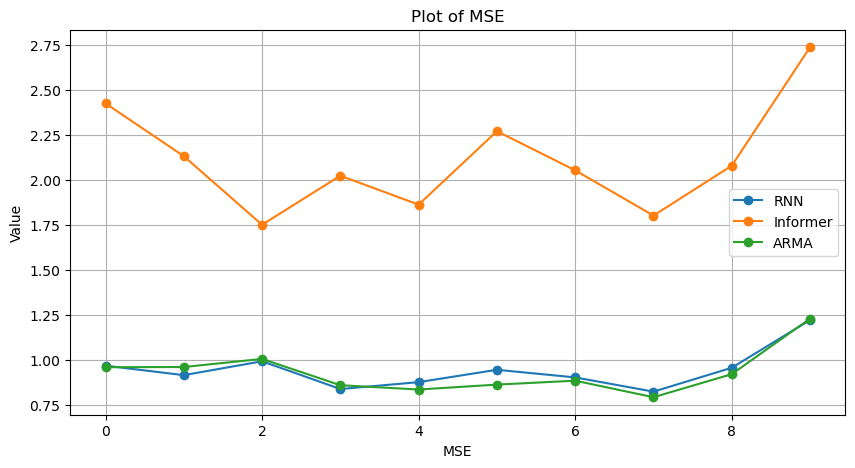

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


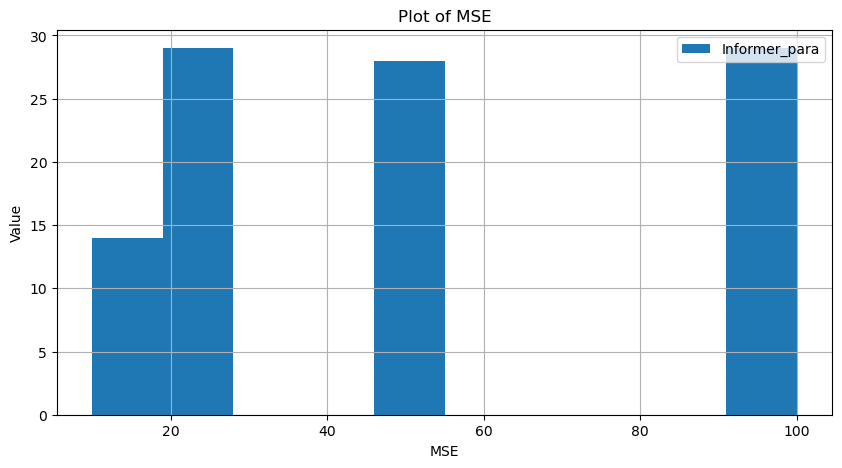

In [34]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()